In [1]:
#Load Packages
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
#Database Load
df = pd.read_excel(r'C:\Users\user\Documents\R\alvaro\01_datos\marketing_campaign.xlsx')

This is a marketing database which has the record of 2240 customers I got from Kaggle.com, and I want to know what kind of customer characteristics are more related to the amount spent on wine products in the last year.

In [3]:
#Here I am selecting the variables from the database I need.

df = df[['Income', 'Year_Birth', 'MntWines', 'Marital_Status', 'Education']]

#I ned to convert this variable from numeric to time
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

#And now I am going to get the age of the customers from the Year of Birth.
today = datetime.today()
df['age'] = df['Year_Birth'].apply(lambda x: today.year - x.year)
df['age'] = df['age'] - 10
df.round({'age': 0})


,Income,Year_Birth,MntWines,Marital_Status,Education,age
0,58138.0,1957-01-01,635,Single,Graduation,56
1,46344.0,1954-01-01,11,Single,Graduation,59
2,71613.0,1965-01-01,426,Together,Graduation,48
3,26646.0,1984-01-01,11,Together,Graduation,29
4,58293.0,1981-01-01,173,Married,PhD,32
...,...,...,...,...,...,...
2235,61223.0,1967-01-01,709,Married,Graduation,46
2236,64014.0,1946-01-01,406,Together,PhD,67
2237,56981.0,1981-01-01,908,Divorced,Graduation,32
2238,69245.0,1956-01-01,428,Together,Master,57


## Descriptive Analysis

In [4]:
#These are the variables I'll working on
df.head()

#These are the descriptive statistics of the non categorical variables. 
df.describe()

,Income,MntWines,age
count,2216.000000,2240.000000,2240.000000
mean,52247.251354,303.935714,44.194196
std,25173.076661,336.597393,11.984069
min,1730.000000,0.000000,17.000000
25%,35303.000000,23.750000,36.000000
50%,51381.500000,173.500000,43.000000
75%,68522.000000,504.250000,54.000000
max,666666.000000,1493.000000,120.000000


With the following box plots, it is possible to see that within all our variables of interest, there are outliers. There is one person whose income is diametrically superior to those of the rest of the people, something similar happens with the age. Also, there are people who spent much more money on wine than the rest.

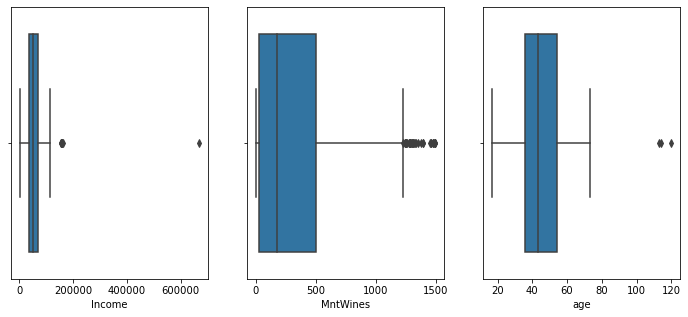

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,5))
sns.boxplot(x=df["Income"], ax=ax1)
sns.boxplot(x=df["MntWines"], ax=ax2)
ax2.set_ylabel("")  # remove y label, but keep ticks
sns.boxplot(x=df["age"], ax=ax3)
ax3.set_ylabel("")  # remove y label, but keep ticks

plt.show()

# Multiple regression


First I am plotting the relation between the dependent variable (money spent on wine) and the
continuous independent variables (Income and age). Both show a positive correlation, but when I run the regression I'll know whether they are statistically significant or not. Also, if I use a lowess line it is possible that the relation of age and the dependent variable has heterocedasticity so it will be necessary to run a robust regression. 

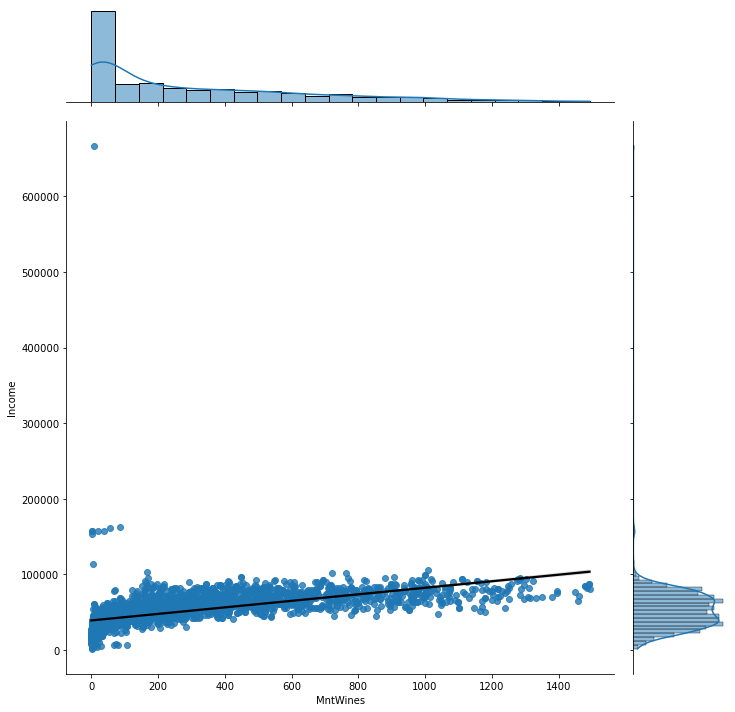

In [6]:
#Money spent on wines vs income

sns.jointplot(x ='MntWines', y ='Income', height = 10, data = df, kind='reg', joint_kws={'line_kws':{'color':'black'}})
plt.show()

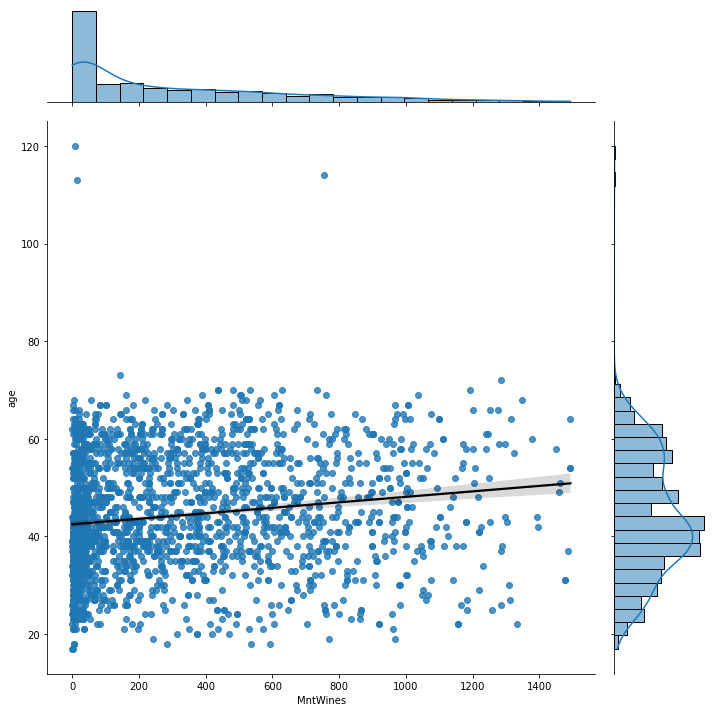

In [7]:
sns.jointplot(x ='MntWines', y ='age', height = 10, data = df, kind='reg', joint_kws={'line_kws':{'color':'black'}})
plt.show()

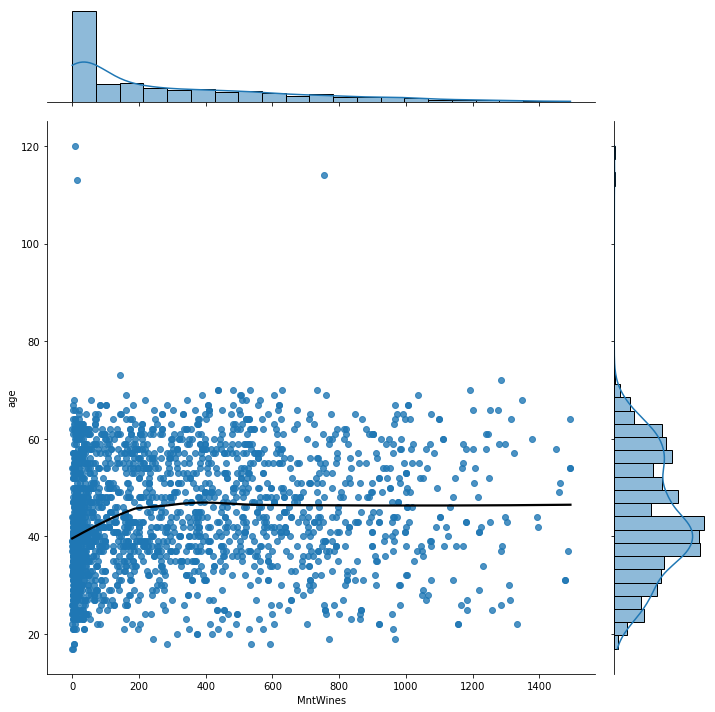

In [12]:
#With lowess

sns.jointplot(x ='MntWines', y ='age', height = 10, data = df, lowess=True, kind='reg', joint_kws={'line_kws':{'color':'black'}})
plt.show()

In [8]:
#I'll need these libraries for running the regression
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

#I need to convert date variables to numeric variables
df['Year_Birth'] = df['Year_Birth'].dt.strftime("%Y").astype(int)

df.head()

,Income,Year_Birth,MntWines,Marital_Status,Education,age
0,58138.0,1957,635,Single,Graduation,56
1,46344.0,1954,11,Single,Graduation,59
2,71613.0,1965,426,Together,Graduation,48
3,26646.0,1984,11,Together,Graduation,29
4,58293.0,1981,173,Married,PhD,32


In [9]:
#We need to create dummies for the categorical variables
df_dummies = pd.get_dummies(df, columns=['Marital_Status', 'Education'])

#Also, we need to get rid of the NA values
df_final = df_dummies.dropna(axis='rows')

df_final.head()

df_final['Income_adjusted']

,Income,Year_Birth,MntWines,age,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,58138.0,1957,635,56,0,0,0,0,1,0,0,0,0,0,1,0,0
1,46344.0,1954,11,59,0,0,0,0,1,0,0,0,0,0,1,0,0
2,71613.0,1965,426,48,0,0,0,0,0,1,0,0,0,0,1,0,0
3,26646.0,1984,11,29,0,0,0,0,0,1,0,0,0,0,1,0,0
4,58293.0,1981,173,32,0,0,0,1,0,0,0,0,0,0,0,0,1


In [11]:
x = df_final[['Income', 'age', 'Marital_Status_Absurd', 'Marital_Status_Alone',
        'Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single',
        'Marital_Status_Together','Marital_Status_Widow','Marital_Status_YOLO',
        'Education_2n Cycle','Education_Basic','Education_Graduation','Education_Master',
       'Education_PhD']] #independent variables
        
y = df_final['MntWines'] #dependent variable

regr = linear_model.LinearRegression()
regr.fit(x,y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x)

#I am using a robust linear regression, given that I have outliers and I want to avoid heterocedasticity: 
# More information here: https://en.wikipedia.org/wiki/Robust_regression
model = sm.RLM(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

Intercept: 
 -173.05512266976632
Coefficients: 
 [ 7.46430987e-03  1.31192965e+00 -6.96899894e+01 -5.31970976e+01
  3.25969032e+01  2.05822787e+01  2.14877856e+01  1.66369988e+01
  2.88112091e+01  2.77191160e+00 -5.66265222e+01 -3.81345853e+01
 -1.34771920e+01  2.99437304e+01  7.82945692e+01]
                    Robust linear Model Regression Results                    
Dep. Variable:               MntWines   No. Observations:                 2216
Model:                            RLM   Df Residuals:                     2202
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 01 Mar 2023                                         
Time:                        15:59:08                                     

## Results

From the regression table, we can see that income is positively correlated with the amount of money spent on wine (AMSW), which means that people who earn more money tend to spend more money on wine, although this effect is weak.

Additionally, there is a negative correlation between AMSW and people with a bachelor's, master's degree, and 2nd cycle, but there is no statistical significance between AMSW and people with basic education or people with a PhD. That means people with a bachelor's and master's degree tend to spend less money on wine.

The correlation between age and AMSW is statistically insignificant (p-value > 0.05). Even though it appears to be a positive relationship in the first plot, the second suggests heteroscedasticity, and the relationship is not linear. Therefore, it is impossible to reach a conclusion.

Furthermore, there is no statistical significance between AMSW and marital status.






